<a href="https://colab.research.google.com/github/victordeman/projects/blob/master/Classify_Images_Using_Python_%26_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# image classification


In [47]:
# we want to load data full of images
pip install keras


The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [0]:
# load the data from cifar-10
# we import this data into 4 variables
from keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [49]:
# we explore the data
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [50]:
# get the shapes
# the x_train has 50000 rows of 32 by 32 pixel images with a depth of 3
# the depth is the visible wavelenghts red,green,blue
# the y_train has 50000 rows and one column 
# 'numpy.ndarray' object has no attribute 'head'
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


when the image at pixel [0] is examined, we find something like 
        [ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        59 belongs top red, 62 belongs to green, 63 belongs blue..

In [51]:
# look at the first image. located at index "0" of the trainning data set
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

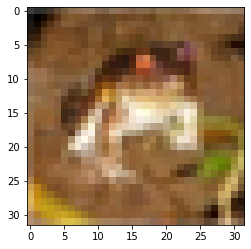

In [93]:
# to show image as picture 
#'AxesImage' object has no attribute 'shape'
# it is a 32*32 pixel image
import matplotlib.pyplot as plt
img1 = plt.imshow(x_train[0])


In [53]:
# print the label of the image
print ('the label is:', y_train[0])

the label is: [6]


In [54]:
# WE WANT TO MANIPULATE THE Y DATA SET.we want to do one hot encoding
# ie convert the labels into a set of 10 numbers to use as input into the neural network
# we do this using the function'to_categorical'

from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# print the new labels in the trainning data set
# it can be seen that we get back a set of 10 digits for each row
print(y_train_one_hot)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [55]:
# print an example of the new labels
# the was the label that was initially at 6
# now with respect to this label, we get back a set of ten digits
# the value one is at the index that corresponds to the label's number
# to verify, we count from the left
print('the one hot label is : ', y_train_one_hot[0])


the one hot label is :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#here we normalize the values between 0 and 1
# the value for pixels are between 0 and 255 so we divide by 255 for each of the pixel values in the dataset
x_train = x_train / 255
x_test  = x_test / 255

In [0]:
# here we build the CNN using the Keras library
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# create the architecture
model = Sequential()

#convolution layer
# this will be used to extract features from the input image and create 32 RALU 5*5 convolved features also known as feature maps
# so we have 32 channels . then we tell the convolution kernel the number of rows and columns which will be 5*5
# the activation function is relu
# since it is the first layer, we give it the input_shape  (32*32 pixels with a depth of 3)

model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

#Maxpooling layer 
# it gets the max element from the convolved feature from the previous layer
# the pool size is 2,2. this means that we will have a 2*2 filter. it can take in a 32*32 image and reduce the dimentionality to 16*16
model.add(MaxPooling2D(pool_size =(2,2)))

#convolution layer
# since it is not the first layer, we remove the input shape
model.add(Conv2D(32, (5,5), activation='relu'))

#Maxpooling layer
model.add(MaxPooling2D(pool_size =(2,2)))

#|Flatten layer
# when an image is flattened, we are making the image a linear rate or a 1d array or 1d vector to feed it into our neural network

model.add(Flatten())

# here we create the neural network with 1000 layers . relu=rectifier linear unit
model.add(Dense(1000, activation='relu'))
# here we create a last layer with 10 neurons since the number of labels we have is 10 and the activation function here is soft max
model.add(Dense(10, activation='softmax'))


not that the smallest value that a pixel cam be is 0 is 0 / 255 = 0
and the highest value that a pixes cannbe is 1 so 255/255 = 1

In [0]:
# compile the CNN here
# we set the loss function to categorical . it is used for classes that are greater than 2 . here we have 10 different classes
# there is also a loss function for binary classification as well to be used if we have 2 classes
# the metrics checks the models accuracy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [134]:
# here we train or fit the model
# the models we want to train are x_train, y_train_one_hot
# the batch size is the total numbewr of training examples
# the number of epochs is the number of iterations when an entire data set is passed forward and backward through the neural network . it will be equal to 10
#the validation_split=0.3. we can split our data into validation, trainning and testing but we can just use this here and split the data into 30% validation and 70% for trainning
# the training can be done over and over again until the accuracy has reached an acceptable level
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 61s 2ms/step - loss: 0.6376 - acc: 0.7801 - val_loss: 1.0142 - val_acc: 0.6587
Epoch 2/10
35000/35000 [==============================] - 54s 2ms/step - loss: 0.5787 - acc: 0.8024 - val_loss: 0.9879 - val_acc: 0.6785
Epoch 3/10
35000/35000 [==============================] - 56s 2ms/step - loss: 0.5188 - acc: 0.8237 - val_loss: 1.0083 - val_acc: 0.6780
Epoch 4/10
35000/35000 [==============================] - 54s 2ms/step - loss: 0.4586 - acc: 0.8458 - val_loss: 1.0140 - val_acc: 0.6831
Epoch 5/10
35000/35000 [==============================] - 54s 2ms/step - loss: 0.3957 - acc: 0.8695 - val_loss: 1.1091 - val_acc: 0.6686
Epoch 6/10
35000/35000 [==============================] - 54s 2ms/step - loss: 0.3475 - acc: 0.8843 - val_loss: 1.1086 - val_acc: 0.6798
Epoch 7/10
35000/35000 [==============================] - 54s 2ms/step - loss: 0.2925 - acc: 0.9059 - val_loss: 1.1509 - val_acc

In [135]:
# get the model's accuracy
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 6s 584us/step


0.6679

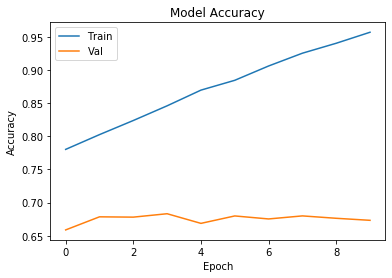

In [137]:
# visualize the model accuracy 
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

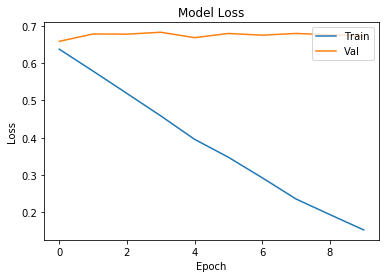

In [138]:
# visualize the model loss
# so we see how well our model did on the data
# after this, we will load one image for the model to classify 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_acc'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [139]:
# get the model's accuracy
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 5s 504us/step


0.6679

In [140]:
#from google.colab import files
# the name in the bracket must be exact . else, there will be error
from google.colab import files 
uploaded = files.upload()
My_image = plt.imread("cat.Jpg")

Saving cat.Jpg to cat (4).Jpg


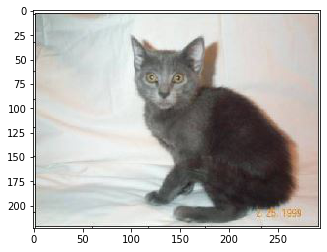

In [141]:
#show the uploade3d image
img=plt.imshow(My_image)

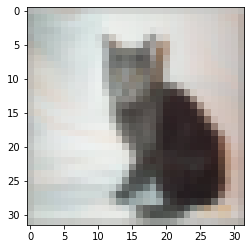

In [142]:
#next, we want to resize the image to put it into the model
# resize the image
# resize takes the input (image name, size we request the image to be resized into)
from skimage.transform import resize
My_image_resized = resize(My_image, (32,32,3)) #
img = plt.imshow(My_image_resized)

In [143]:
# here we get the probability of each class. so basically, we get the array of probabilities
# here we want to predict what the image is . we have to make the image an array
import numpy as np
probabilities = model.predict(np.array([My_image_resized]))


#print the probabilities
probabilities

array([[1.5572814e-06, 2.9554118e-14, 8.6013693e-03, 1.4704624e-01,
        1.2444601e-05, 3.7185380e-06, 1.9080984e-07, 8.4433293e-01,
        1.0159079e-07, 1.5217845e-06]], dtype=float32)

In [144]:
# number to class
# we don't want to remember the name of each label
number_to_class = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']
# we want to sort the probability in acending order. lowest probability will be at index 0 and the highest at 9
index = np.argsort(probabilities[0,:])
# we want to print the five most likely classes for the image
# number_to_class allows us to see the class we want to it's numbe rto get the most l
print('Most likely class: ', number_to_class[index[9]], '--probability:',probabilities[0, index[9]])
print('second Most likely class: ', number_to_class[index[8]], '--probability:',probabilities[0, index[8]])
print('third Most likely class: ', number_to_class[index[7]], '--probability:',probabilities[0, index[7]])
print('fourth Most likely class: ', number_to_class[index[6]], '--probability:',probabilities[0, index[6]])
print('fifth Most likely class: ', number_to_class[index[5]], '--probability:',probabilities[0, index[5]])
print('second Most likely class: ', number_to_class[index[4]], '--probability:',probabilities[0, index[4]])
print('second Most likely class: ', number_to_class[index[3]], '--probability:',probabilities[0, index[3]])
print('second Most likely class: ', number_to_class[index[2]], '--probability:',probabilities[0, index[2]])
print('second Most likely class: ', number_to_class[index[1]], '--probability:',probabilities[0, index[1]])


Most likely class:  horse --probability: 0.84433293
second Most likely class:  cat --probability: 0.14704624
third Most likely class:  bird --probability: 0.008601369
fourth Most likely class:  deer --probability: 1.2444601e-05
fifth Most likely class:  dog --probability: 3.718538e-06
second Most likely class:  airplane --probability: 1.5572814e-06
second Most likely class:  truck --probability: 1.5217845e-06
second Most likely class:  frog --probability: 1.9080984e-07
second Most likely class:  ship --probability: 1.0159079e-07


In [0]:
#save the model
model.save('my_model.h5')

In [0]:
#load the model
from keras.model import load_model
model = load_model('my_model.h5')

so we took an image, resized it , then used our model to reclassify it

the lowest probability is 1.1089161e-03 and the highest probability is 8.9737633e-03